In [1]:
import sys
sys.path.append(r'./src/')

import pandas as pd
import xgboost as xgb
import matplotlib.pyplot as plt
import seaborn as sns
import data
import numpy as np

from imbalancedXGBoost import ImbalancedXGBoost
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


The type of 'X' is:  <class 'numpy.ndarray'>
The length of 'X' is:  918
The shape of 'X' is:  (918, 11)
The type of the first 'X' entry is:  <class 'numpy.ndarray'>
The type of the first 'X[0]' entry is:  <class 'numpy.float64'>
'X':  [[40.   0.   0.  ...  0.   0.   0. ]
 [49.   1.   1.  ...  0.   1.   1. ]
 [37.   0.   0.  ...  0.   0.   0. ]
 ...
 [57.   0.   2.  ...  1.   1.2  1. ]
 [57.   1.   0.  ...  0.   0.   1. ]
 [38.   0.   1.  ...  0.   0.   0. ]]
*******************************************
The type of 'y' is:  <class 'numpy.ndarray'>
The length of 'y' is:  918
The shape of 'y' is:  (918,)
The type of the first 'y' entry is:  <class 'numpy.int64'>
'y':  [0 1 0 1 0 0 0 0 1 0 0 1 0 1 0 0 1 0 1 1 0 0 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1
 0 0 0 0 1 0 0 1 0 0 0 0 1 1 1 0 0 0 0 1 1 0 1 0 0 0 1 0 0 0 0 1 0 1 0 1 0
 1 0 1 0 0 1 0 0 1 0 1 1 1 0 1 0 0 0 0 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0
 1 0 0 0 1 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 1 1 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0
 0 1 0 0 0 0 0 1 1 0 1 0 1 

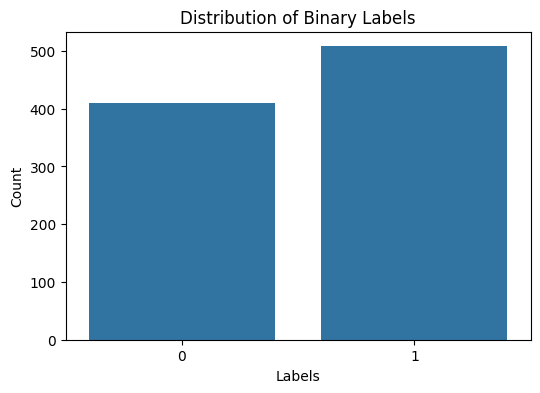

In [2]:
X, y = data.get_heart_failure()

# Looking into the type, length, and shape of the data for a better understanding
# Explain X
print("The type of 'X' is: ", type(X))
print("The length of 'X' is: ", len(X))
print("The shape of 'X' is: ", X.shape)
print("The type of the first 'X' entry is: ", type(X[0]))
print("The type of the first 'X[0]' entry is: ", type(X[0][0]))
print("'X': ", X)
print("*******************************************")
# Explain y
print("The type of 'y' is: ", type(y))
print("The length of 'y' is: ", len(y))
print("The shape of 'y' is: ", y.shape)
print("The type of the first 'y' entry is: ", type(y[0]))
print("'y': ", y)

# Understanding how skewed the data is if at all
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Binary Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = xgb.XGBClassifier(n_estimators=10)

model.fit(X_train, y_train)

predictions = model.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)


print(f'Basic Model Accuracy: \t{accuracy*100:.2f}%')
print(f'Basic Model Precision: \t{precision*100:.2f}%')
print(f'Basic Model Recall: \t{recall*100:.2f}%')
print(f'Basic Model F1: \t{f1*100:.2f}%')

Basic Model Accuracy: 	88.59%
Basic Model Precision: 	90.57%
Basic Model Recall: 	89.72%
Basic Model F1: 	90.14%


In [5]:
n_estimators = 10
max_depth = 10 
max_leaves = 0
eta_learning_rate = 0.1 
verbosity = 1
objective = 'binary:logistic' 
booster = 'gbtree'
gamma = 0.0
min_child_weight = 1.0
early_stopping_rounds = None
eval_metric = 'logloss'
l1_reg_alpha = 0.0
l2_reg_lambda = 1.0
focal_gamma = None
weighted_alpha = None

model = ImbalancedXGBoost(n_estimators, max_depth, max_leaves, eta_learning_rate, 
                          verbosity, objective, booster, gamma, min_child_weight, 
                          early_stopping_rounds, eval_metric, l1_reg_alpha, l2_reg_lambda, 
                          focal_gamma, weighted_alpha)

model.fit(X_train, y_train)
predictions = model.predict(X_test, y_test)


accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)


print(f'My Basic Implementation Accuracy: \t{accuracy*100:.2f}%')
print(f'My Basic Implementation Precision: \t{precision*100:.2f}%')
print(f'My Basic Implementation Recall: \t{recall*100:.2f}%')
print(f'My Basic Implementation F1: \t{f1*100:.2f}%')

My Basic Implementation Accuracy: 	87.50%
My Basic Implementation Precision: 	88.89%
My Basic Implementation Recall: 	89.72%
My Basic Implementation F1: 	89.30%


In [6]:
objective = 'weighted' 
weighted_alpha = 0.4

model = ImbalancedXGBoost(n_estimators, max_depth, max_leaves, eta_learning_rate, 
                          verbosity, objective, booster, gamma, min_child_weight, 
                          early_stopping_rounds, eval_metric, l1_reg_alpha, l2_reg_lambda, 
                          focal_gamma, weighted_alpha)

model.fit(X_train, y_train)
predictions = model.predict(X_test, y_test)

accuracy = accuracy_score(y_test, predictions)

print(f'Weighted Accuracy: \t{accuracy*100:.2f}%')

Weighted Accuracy: 	38.04%


In [7]:
objective = 'focal' 
focal_gamma = 1.5

model = ImbalancedXGBoost(n_estimators, max_depth, max_leaves, eta_learning_rate, 
                          verbosity, objective, booster, gamma, min_child_weight, 
                          early_stopping_rounds, eval_metric, l1_reg_alpha, l2_reg_lambda, 
                          focal_gamma, weighted_alpha)

model.fit(X_train, y_train)
predictions = model.predict(X_test, y_test)
accuracy = accuracy_score(y_test, predictions)\

print(f'focal Accuracy: \t{accuracy*100:.2f}%')

focal Accuracy: 	82.07%


The type of 'X' is:  <class 'numpy.ndarray'>
The length of 'X' is:  208
The shape of 'X' is:  (208, 60)
The type of the first 'X' entry is:  <class 'numpy.ndarray'>
The type of the first 'X[0]' entry is:  <class 'numpy.float64'>
'X':  [[0.02   0.0371 0.0428 ... 0.0084 0.009  0.0032]
 [0.0453 0.0523 0.0843 ... 0.0049 0.0052 0.0044]
 [0.0262 0.0582 0.1099 ... 0.0164 0.0095 0.0078]
 ...
 [0.0522 0.0437 0.018  ... 0.0138 0.0077 0.0031]
 [0.0303 0.0353 0.049  ... 0.0079 0.0036 0.0048]
 [0.026  0.0363 0.0136 ... 0.0036 0.0061 0.0115]]
*******************************************
The type of 'y' is:  <class 'numpy.ndarray'>
The length of 'y' is:  208
The shape of 'y' is:  (208,)
The type of the first 'y' entry is:  <class 'numpy.int64'>
'y':  [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1

/Users/alexnemecek/Desktop/Machine Learning/csds440project-f23-4/ajn98-boosting/data.py:55: Warning: If there are no headers in the file, then this function assumes that the labels are in the final column and everything before is data. Please verify that your dataset takes this form before moving forward.
  warnings.warn("If there are no headers in the file, then this function assumes that the labels are in the final column and everything before is data. Please verify that your dataset takes this form before moving forward.", Warning)


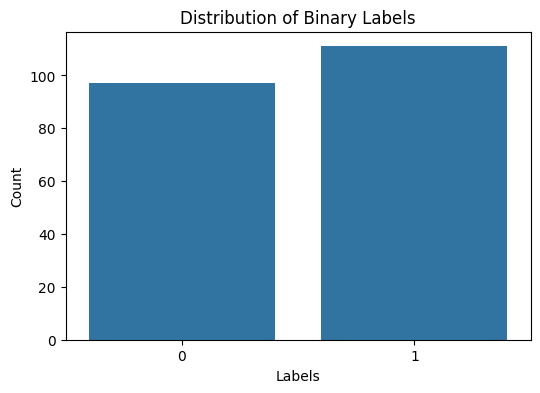

In [8]:
X, y = data.get_sonar_mines()

# Looking into the type, length, and shape of the data for a better understanding
# Explain X
print("The type of 'X' is: ", type(X))
print("The length of 'X' is: ", len(X))
print("The shape of 'X' is: ", X.shape)
print("The type of the first 'X' entry is: ", type(X[0]))
print("The type of the first 'X[0]' entry is: ", type(X[0][0]))
print("'X': ", X)
print("*******************************************")
# Explain y
print("The type of 'y' is: ", type(y))
print("The length of 'y' is: ", len(y))
print("The shape of 'y' is: ", y.shape)
print("The type of the first 'y' entry is: ", type(y[0]))
print("'y': ", y)

# Understanding how skewed the data is if at all
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Binary Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
model = xgb.XGBClassifier(n_estimators=10)

model.fit(X_train, y_train)

predictions = model.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)


print(f'Basic Model Accuracy: \t{accuracy*100:.2f}%')
print(f'Basic Model Precision: \t{precision*100:.2f}%')
print(f'Basic Model Recall: \t{recall*100:.2f}%')
print(f'Basic Model F1: \t{f1*100:.2f}%')

Basic Model Accuracy: 	78.57%
Basic Model Precision: 	86.96%
Basic Model Recall: 	76.92%
Basic Model F1: 	81.63%


In [11]:
n_estimators = 10
max_depth = 10 
max_leaves = 0
eta_learning_rate = 0.1 
verbosity = 1
objective = 'binary:logistic' 
booster = 'gbtree'
gamma = 0.0
min_child_weight = 1.0
early_stopping_rounds = None
eval_metric = 'logloss'
l1_reg_alpha = 0.0
l2_reg_lambda = 1.0
focal_gamma = None
weighted_alpha = None

model = ImbalancedXGBoost(n_estimators, max_depth, max_leaves, eta_learning_rate, 
                          verbosity, objective, booster, gamma, min_child_weight, 
                          early_stopping_rounds, eval_metric, l1_reg_alpha, l2_reg_lambda, 
                          focal_gamma, weighted_alpha)

model.fit(X_train, y_train)
predictions = model.predict(X_test, y_test)


accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)


print(f'My Basic Implementation Accuracy: \t{accuracy*100:.2f}%')
print(f'My Basic Implementation Precision: \t{precision*100:.2f}%')
print(f'My Basic Implementation Recall: \t{recall*100:.2f}%')
print(f'My Basic Implementation F1: \t{f1*100:.2f}%')

My Basic Implementation Accuracy: 	78.57%
My Basic Implementation Precision: 	86.96%
My Basic Implementation Recall: 	76.92%
My Basic Implementation F1: 	81.63%


In [12]:
objective = 'weighted' 
weighted_alpha = 0.4

model = ImbalancedXGBoost(n_estimators, max_depth, max_leaves, eta_learning_rate, 
                          verbosity, objective, booster, gamma, min_child_weight, 
                          early_stopping_rounds, eval_metric, l1_reg_alpha, l2_reg_lambda, 
                          focal_gamma, weighted_alpha)

model.fit(X_train, y_train)
predictions = model.predict(X_test, y_test)

accuracy = accuracy_score(y_test, predictions)

print(f'Weighted Accuracy: \t{accuracy*100:.2f}%')

Weighted Accuracy: 	45.24%


In [13]:
objective = 'focal' 
focal_gamma = 1.5

model = ImbalancedXGBoost(n_estimators, max_depth, max_leaves, eta_learning_rate, 
                          verbosity, objective, booster, gamma, min_child_weight, 
                          early_stopping_rounds, eval_metric, l1_reg_alpha, l2_reg_lambda, 
                          focal_gamma, weighted_alpha)

model.fit(X_train, y_train)
predictions = model.predict(X_test, y_test)
accuracy = accuracy_score(y_test, predictions)

print(f'focal Accuracy: \t{accuracy*100:.2f}%')

focal Accuracy: 	69.05%


The type of 'X' is:  <class 'numpy.ndarray'>
The length of 'X' is:  768
The shape of 'X' is:  (768, 8)
The type of the first 'X' entry is:  <class 'numpy.ndarray'>
The type of the first 'X[0]' entry is:  <class 'numpy.float64'>
'X':  [[  6.    148.     72.    ...  33.6     0.627  50.   ]
 [  1.     85.     66.    ...  26.6     0.351  31.   ]
 [  8.    183.     64.    ...  23.3     0.672  32.   ]
 ...
 [  5.    121.     72.    ...  26.2     0.245  30.   ]
 [  1.    126.     60.    ...  30.1     0.349  47.   ]
 [  1.     93.     70.    ...  30.4     0.315  23.   ]]
*******************************************
The type of 'y' is:  <class 'numpy.ndarray'>
The length of 'y' is:  768
The shape of 'y' is:  (768,)
The type of the first 'y' entry is:  <class 'numpy.int64'>
'y':  [1 0 1 0 1 0 1 0 1 1 0 1 0 1 1 1 1 1 0 1 0 0 1 1 1 1 1 0 0 0 0 1 0 0 0 0 0
 1 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 1 0 0 1 0 0 0 0 1 0 0 1 0 1 0 0 0 1 0 1 0
 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0

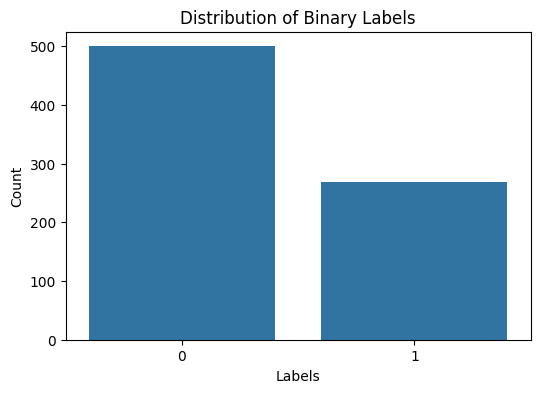

In [14]:
X, y = data.get_pima_diabetes()

# Looking into the type, length, and shape of the data for a better understanding
# Explain X
print("The type of 'X' is: ", type(X))
print("The length of 'X' is: ", len(X))
print("The shape of 'X' is: ", X.shape)
print("The type of the first 'X' entry is: ", type(X[0]))
print("The type of the first 'X[0]' entry is: ", type(X[0][0]))
print("'X': ", X)
print("*******************************************")
# Explain y
print("The type of 'y' is: ", type(y))
print("The length of 'y' is: ", len(y))
print("The shape of 'y' is: ", y.shape)
print("The type of the first 'y' entry is: ", type(y[0]))
print("'y': ", y)

# Understanding how skewed the data is if at all
plt.figure(figsize=(6, 4))
sns.countplot(x=y)
plt.title('Distribution of Binary Labels')
plt.xlabel('Labels')
plt.ylabel('Count')
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
model = xgb.XGBClassifier(n_estimators=10)

model.fit(X_train, y_train)

predictions = model.predict(X_test)


accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)


print(f'Basic Model Accuracy: \t{accuracy*100:.2f}%')
print(f'Basic Model Precision: \t{precision*100:.2f}%')
print(f'Basic Model Recall: \t{recall*100:.2f}%')
print(f'Basic Model F1: \t{f1*100:.2f}%')

Basic Model Accuracy: 	73.38%
Basic Model Precision: 	62.50%
Basic Model Recall: 	63.64%
Basic Model F1: 	63.06%


In [17]:
n_estimators = 10
max_depth = 10 
max_leaves = 0
eta_learning_rate = 0.1 
verbosity = 1
objective = 'binary:logistic' 
booster = 'gbtree'
gamma = 0.0
min_child_weight = 1.0
early_stopping_rounds = None
eval_metric = 'logloss'
l1_reg_alpha = 0.0
l2_reg_lambda = 1.0
focal_gamma = None
weighted_alpha = None

model = ImbalancedXGBoost(n_estimators, max_depth, max_leaves, eta_learning_rate, 
                          verbosity, objective, booster, gamma, min_child_weight, 
                          early_stopping_rounds, eval_metric, l1_reg_alpha, l2_reg_lambda, 
                          focal_gamma, weighted_alpha)

model.fit(X_train, y_train)
predictions = model.predict(X_test, y_test)


accuracy = accuracy_score(y_test, predictions)
precision = precision_score(y_test, predictions)
recall = recall_score(y_test, predictions)
f1 = f1_score(y_test, predictions)


print(f'My Basic Implementation Accuracy: \t{accuracy*100:.2f}%')
print(f'My Basic Implementation Precision: \t{precision*100:.2f}%')
print(f'My Basic Implementation Recall: \t{recall*100:.2f}%')
print(f'My Basic Implementation F1: \t{f1*100:.2f}%')

My Basic Implementation Accuracy: 	72.73%
My Basic Implementation Precision: 	62.75%
My Basic Implementation Recall: 	58.18%
My Basic Implementation F1: 	60.38%


In [18]:
objective = 'weighted' 
weighted_alpha = 0.4

model = ImbalancedXGBoost(n_estimators, max_depth, max_leaves, eta_learning_rate, 
                          verbosity, objective, booster, gamma, min_child_weight, 
                          early_stopping_rounds, eval_metric, l1_reg_alpha, l2_reg_lambda, 
                          focal_gamma, weighted_alpha)

model.fit(X_train, y_train)
predictions = model.predict(X_test, y_test)

accuracy = accuracy_score(y_test, predictions)

print(f'Weighted Accuracy: \t{accuracy*100:.2f}%')

Weighted Accuracy: 	27.92%


In [19]:
objective = 'focal' 
focal_gamma = 1.5

model = ImbalancedXGBoost(n_estimators, max_depth, max_leaves, eta_learning_rate, 
                          verbosity, objective, booster, gamma, min_child_weight, 
                          early_stopping_rounds, eval_metric, l1_reg_alpha, l2_reg_lambda, 
                          focal_gamma, weighted_alpha)

model.fit(X_train, y_train)
predictions = model.predict(X_test, y_test)
accuracy = accuracy_score(y_test, predictions)\

print(f'focal Accuracy: \t{accuracy*100:.2f}%')

focal Accuracy: 	72.73%
